In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",70)
pd.set_option('display.float_format', '{:.2f}'.format)
import missingno as msno



In [4]:
#reading the excel data
df = pd.read_excel(r"C:\Users\aalme\OneDrive\Desktop\KPMG Data_Spend Analytics\KPMG Data_Spend Analytics 2.xlsx")

In [5]:
#shape of data
df.shape

(151412, 65)

In [6]:
df.head()

,Purch.Doc.,Item,Changed On,Short Text,Material,CoCd,Plnt,SLoc,TrackingNo,Matl Group,PO Quantity,OUn,OPU,Conv.,Eq. To,Net Price,Per,Net Value,Gross value,GRT,Overdel. Tol.,Underdel.Tol.,DCI,A,Cns,Item.1,Agr. Cum. Qty,TOZ,BUn,Non-deductible,Quantity,Price Date,Cat,Effective value,PTm,Net Weight,Un,S,Profit Ctr,Gross Weight,Volume,Net value,S.1,Object no.,Time of Transmission,Next Transmission Number,Itm,RShLi,MTyp,NCM Code,Spec. Stk Valuation,Reb.basis,Requested By,Itm.1,Requirement Urgency,CRM Item No,Down Payment Amount,Priority (Material Required Within),Ordered By,Approved By,Priority,Section,Indenter ID,Input Tax Credit,Item.2
0,1000007270,10,2018-03-24,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.00,9000,9110,NaN,NaN,1310,1.00,EA,EA,1,1,4400.00,1,4400.00,4400.00,0,0,0,X,Q,P,0,0,0,EA,0.00,0,2018-03-24,F,0.00,0,0.00,NaN,Q,0000009110,0.00,0.00,0,NaN,0,00:00:00,1,0,0,YGEN,84369900,M,0.00,NaN,0,0,0,0,7,54745,54680,Medium,Maintenance,54745,T2,0
1,1000007270,20,2018-03-24,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969020.00,9000,9110,NaN,NaN,1310,1.00,EA,EA,1,1,6100.00,1,6100.00,6100.00,0,0,0,X,Q,P,0,0,0,EA,0.00,0,2018-03-24,F,0.00,0,0.00,NaN,Q,0000009110,0.00,0.00,0,NaN,0,00:00:00,1,0,1,YGEN,84369900,M,0.00,NaN,0,0,0,0,7,54745,54680,Medium,Maintenance,54745,T2,0
2,1000007299,10,2018-09-29,Tata LPT 909/38/Cab,815810.00,9000,9110,NaN,NaN,ASSETS,11.00,EA,EA,1,1,823472.00,1,9058192.00,9058192.00,0,0,0,X,Q,P,0,0,0,EA,0.00,0,2018-05-07,F,0.00,0,0.00,KG,Q,0000009110,0.00,0.00,0,NaN,0,00:00:00,1,0,1,YCGM,8704,M,9058192.00,NaN,0,0,0,0,0,54651,54680,NaN,0,54651,T3,0
3,1000007299,20,2018-09-29,TCS @ 1% - Tata LPT 909/38/Cab,NaN,9000,9110,NaN,NaN,ASSETS,11.00,EA,EA,1,0,10540.00,1,115940.00,115940.00,0,0,0,X,P,V,0,0,0,NaN,0.00,0,2018-05-07,F,0.00,0,0.00,NaN,NaN,NaN,0.00,0.00,0,NaN,0,00:00:00,1,0,0,NaN,NaN,NaN,115940.00,NaN,0,0,0,0,0,0,0,NaN,0,0,T3,0
4,1000007299,30,2018-09-29,RTO - Tata LPT 909/38/Cab,NaN,9000,9110,NaN,NaN,ASSETS,11.00,EA,EA,1,0,10000.00,1,110000.00,110000.00,0,0,0,NaN,P,V,0,0,0,NaN,0.00,0,2018-05-07,F,0.00,0,0.00,NaN,NaN,NaN,0.00,0.00,0,NaN,0,00:00:00,1,0,0,NaN,NaN,NaN,110000.00,NaN,0,0,0,0,0,0,0,NaN,0,0,T3,0


# Prepocessing

In [7]:
#checking missing values
df.isnull().sum()

Purch.Doc.                                  0
Item                                        0
Changed On                                  0
Short Text                                  0
Material                                 3091
CoCd                                        0
Plnt                                        0
SLoc                                    32176
TrackingNo                             142207
Matl Group                                  0
PO Quantity                                 0
OUn                                         0
OPU                                         0
Conv.                                       0
Eq. To                                      0
Net Price                                   0
Per                                         0
Net Value                                   0
Gross value                                 0
GRT                                         0
Overdel. Tol.                               0
Underdel.Tol.                     

<AxesSubplot:>

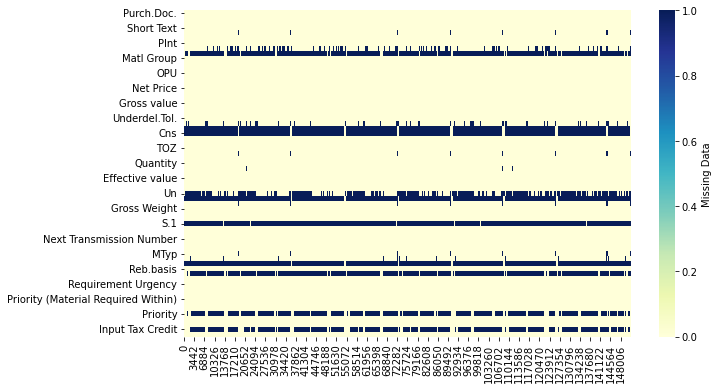

In [8]:
#Plotting missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})


In [9]:
#Calculating% of missing values
dt = (df.isna().mean().round(4) * 100).reset_index()
dt.columns = ['Column Name','% Null Values']
dt

,Column Name,% Null Values
0,Purch.Doc.,0.00
1,Item,0.00
2,Changed On,0.00
3,Short Text,0.00
4,Material,2.04
5,CoCd,0.00
6,Plnt,0.00
7,SLoc,21.25
8,TrackingNo,93.92
9,Matl Group,0.00


In [10]:
# extracting year and month from date

df['Changed On'] =  pd.to_datetime(df['Changed On'], format='%Y-%m-%d')
df['Order_year'] = df['Changed On'].dt.year
df['Order_month'] = df['Changed On'].dt.month

In [11]:
# Analysing the qty ordered by year
a = df.groupby("Order_year")["Quantity"].count()
a = a.to_frame()
a

,Quantity
Order_year,
2012,1
2014,27
2015,4
2016,9
2017,32
2018,79795
2019,71544


Text(0, 0.5, 'Quantity')

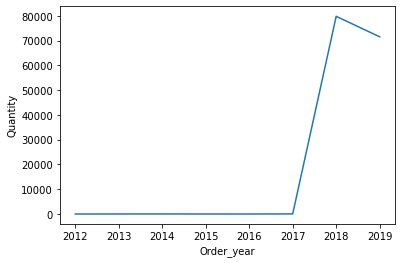

In [12]:
#plotting qty ordered by year
plt.plot(a)
plt.xlabel("Order_year")
plt.ylabel("Quantity")

## 1) - It is clear from the above table that from 2012 - 2017 there was not much purchasing done and so we'll be only using 2018 - 2019 data for our analysis.  

In [13]:
# keeping only 2018 and 2019 data and removing the rest
df = df[df['Order_year'].isin([2018,2019])]

In [14]:
#  Checking columns with missing values
df[df.columns[df.isnull().any()]].isnull().mean().round(4) * 100

Material               2.03
SLoc                  21.24
TrackingNo            93.92
DCI                    9.89
A                     95.55
Cns                   95.55
BUn                    2.03
Price Date             0.37
Un                    55.45
S                     97.59
Profit Ctr             2.03
S.1                   99.09
MTyp                   2.03
NCM Code               2.27
Spec. Stk Valuation   97.59
Requested By          91.84
Priority              80.85
Input Tax Credit      78.95
dtype: float64

## 2) We can eliminate columns with more than 80% missing values

In [15]:
# Remove columns with more than 80% missing value except priority (we'll be using it later)
df.drop(['TrackingNo','A','Cns','S','S.1','Spec. Stk Valuation','Requested By'], inplace=True, axis='columns')
df.shape

(151339, 60)

## 3) Out of 60 columns there are column with only 1 unique values which won't provide us much insight about our data so we can eliminate such columns

In [16]:
#checking count of unique values
df.nunique()

Purch.Doc.                             84345
Item                                      58
Changed On                               296
Short Text                             12383
Material                                3542
CoCd                                       5
Plnt                                     135
SLoc                                    1525
Matl Group                               153
PO Quantity                            27109
OUn                                       33
OPU                                       33
Conv.                                      1
Eq. To                                     3
Net Price                              16524
Per                                      102
Net Value                              69101
Gross value                            67696
GRT                                        1
Overdel. Tol.                             17
Underdel.Tol.                              6
DCI                                        1
Item.1    

In [17]:
# Remove columns with only 1 unique value
columns_to_drop = ['Conv.', 'GRT', 'DCI', 'Agr. Cum. Qty', 'TOZ', 'Quantity', 'Cat',
       'Net value', 'Object no.', 'Time of Transmission',
       'Next Transmission Number', 'Itm', 'Itm.1', 'Requirement Urgency',
       'CRM  Item No', 'Down Payment Amount', 'Item.2']

df.drop(columns_to_drop, inplace=True, axis='columns')
df.shape

(151339, 43)

In [18]:
#removing columns which does not have any effect on the Gross or net values of purchase

columns_to_drop = ['OUn','OPU','BUn','Un','Gross Weight','Volume','Net Weight','RShLi',
                   'Item.1','Eq. To','Non-deductible','Input Tax Credit','Reb.basis',
                   'Ordered By','Approved By','Indenter ID']
df.drop(columns_to_drop, inplace=True, axis='columns')
df.shape

(151339, 27)

## 4) There are still some missing values in the data. Next step will be to treat those missing  values.

In [19]:
# Checking columns with missing values
df[df.columns[df.isnull().any()]].isnull().mean().round(4) * 100

Material      2.03
SLoc         21.24
Price Date    0.37
Profit Ctr    2.03
MTyp          2.03
NCM Code      2.27
Priority     80.85
dtype: float64

In [20]:
#since only 2% of values are missing from material column we can drop it
df.dropna(axis = 0, subset = ["Material"], inplace = True)

In [21]:
# Checking columns with missing values
df[df.columns[df.isnull().any()]].isnull().mean().round(4) * 100

SLoc         20.10
Price Date    0.33
NCM Code      2.00
Priority     80.96
dtype: float64

In [22]:
#after dropping missing row of material Price Date and NCM Code are 
# also left with only 2% of missing values so we can drop it without affecting the data
df.dropna(axis = 0, subset = ["NCM Code"], inplace = True)
df.dropna(axis = 0, subset = ["Price Date"], inplace = True)

In [23]:
# Checking columns with missing values
df[df.columns[df.isnull().any()]].isnull().mean().round(4) * 100

SLoc       20.43
Priority   81.09
dtype: float64

In [24]:
#for Sloc we can replace missing values with mode
df['SLoc'] = df['SLoc'].fillna(df['SLoc'].mode()[0])
df[df.columns[df.isnull().any()]].isnull().mean().round(4) * 100

Priority   81.09
dtype: float64

In [25]:
#Priority has more than 80% missing value but it can be since not all orders must be on priority
#Analysing priority column since we can't drop it
df['Priority'].value_counts(dropna=False)

NaN          117444
Medium        13113
High           4928
Low            4706
Very High      4527
MEDIUM           41
MEDIAM           36
medium           28
yMedium           1
high              1
Name: Priority, dtype: int64

In [26]:
#Clearly priority column values needs cleaning there is different entries for same status

df['Priority'] = np.where(df['Priority'].isin(['MEDIUM','MEDIAM','medium','yMedium']),'Medium', df['Priority'])
df['Priority'] = np.where(df['Priority'].isin(['high']),'High', df['Priority'])
df['Priority'].value_counts(dropna=False)

NaN          117444
Medium        13219
High           4929
Low            4706
Very High      4527
Name: Priority, dtype: int64

In [27]:
# Fill Priority NAN with with Normal
df['Priority'] = df['Priority'].fillna(value='Normal')
df['Priority'].value_counts(dropna=False)

Normal       117444
Medium        13219
High           4929
Low            4706
Very High      4527
Name: Priority, dtype: int64

<AxesSubplot:>

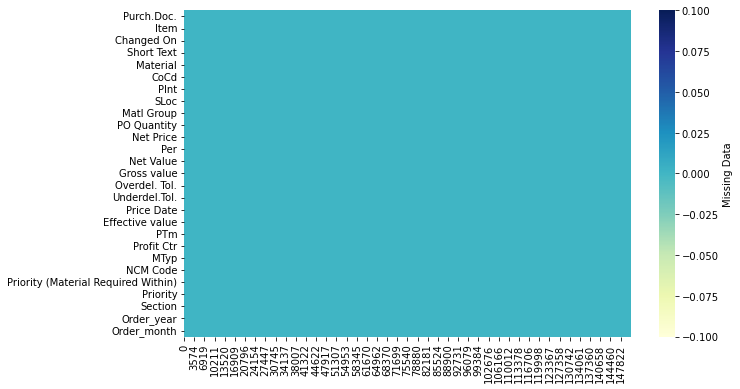

In [28]:
#Plotting missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})


## 5) Final check for the columns we need

In [29]:
df.describe(exclude=None)

,Purch.Doc.,Item,Material,CoCd,PO Quantity,Net Price,Per,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Effective value,PTm,Priority (Material Required Within),Order_year,Order_month
count,144825.00,144825.00,144825.00,144825.00,144825.00,144825.00,144825.00,144825.00,144825.00,144825.00,144825.00,144825.00,144825.00,144825.00,144825.00,144825.00
mean,8374218131.73,18.51,3219672.10,8491.97,14006.29,7656.61,64.86,301046.35,301419.39,0.26,0.05,1283.56,0.00,1.76,2018.47,6.71
std,1349423805.89,22.75,3018629.83,709.65,85266.29,64701.59,906.85,1866282.63,1866170.96,1.75,0.61,175461.41,0.00,6.49,0.50,4.61
min,1000007248.00,1.00,800000.00,4500.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2018.00,1.00
25%,7600176230.00,10.00,910420.00,7860.00,25.07,14.50,1.00,600.00,628.56,0.00,0.00,0.00,0.00,0.00,2018.00,2.00
50%,9100295517.00,10.00,950020.00,9000.00,427.00,27.80,1.00,51397.50,51625.00,0.00,0.00,0.00,0.00,0.00,2018.00,10.00
75%,9200092425.00,20.00,7101320.00,9000.00,7500.00,220.00,1.00,236907.50,237904.50,0.00,0.00,0.00,0.00,0.00,2019.00,11.00
max,9900000070.00,550.00,8800080.00,9000.00,5000000.00,5851840.87,79400.00,212000000.00,212000000.00,40.00,30.00,41482076.16,0.00,99.00,2019.00,12.00


In [30]:
#In the above desciption we can notice that minimum gross value is 0. 
#Records with 0 gross value are of no use for our analysis.
# lets check how many zeroes Gross Value
df[df['Gross value']==0].shape

(28262, 27)

In [31]:
#Remove 0 Gross Value
df = df[df['Gross value']!=0]
df.shape

(116563, 27)

In [32]:
df.head()

,Purch.Doc.,Item,Changed On,Short Text,Material,CoCd,Plnt,SLoc,Matl Group,PO Quantity,Net Price,Per,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Price Date,Effective value,PTm,Profit Ctr,MTyp,NCM Code,Priority (Material Required Within),Priority,Section,Order_year,Order_month
0,1000007270,10,2018-03-24,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.00,9000,9110,CGEN,1310,1.00,4400.00,1,4400.00,4400.00,0,0,2018-03-24,0.00,0,0000009110,YGEN,84369900,7,Medium,Maintenance,2018,3
1,1000007270,20,2018-03-24,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969020.00,9000,9110,CGEN,1310,1.00,6100.00,1,6100.00,6100.00,0,0,2018-03-24,0.00,0,0000009110,YGEN,84369900,7,Medium,Maintenance,2018,3
2,1000007299,10,2018-09-29,Tata LPT 909/38/Cab,815810.00,9000,9110,CGEN,ASSETS,11.00,823472.00,1,9058192.00,9058192.00,0,0,2018-05-07,0.00,0,0000009110,YCGM,8704,0,Normal,0,2018,9
5,1000007299,40,2018-09-29,"Tata LPT 1412 CRX, BS-IV, 48, SHDLB, 12.",816630.00,9000,9110,CGEN,ASSETS,10.00,1167969.00,1,11679690.00,11679690.00,0,0,2018-05-07,0.00,0,0000009110,YCGM,8704,0,Normal,0,2018,9
8,1000007320,10,2018-12-07,Material for Prefabricated buildings,814720.00,9000,9406,CGEN,1342,1.00,2096100.97,1,2096100.97,2096100.97,0,0,2018-05-18,0.00,0,0000009406,YCGM,9406,0,Normal,0,2018,12


In [33]:
# Save the preprocessed file
df.to_csv("Final_spend_analytics.csv", index=False)

# EDA
 - Gross value , Qty, Date, cost per unit

## Top 5 Purchase Orders With most items

In [34]:
df['Purch.Doc.'].value_counts().head(5)

7000013995    55
1000007516    51
3000000155    50
1000007248    49
1000007481    47
Name: Purch.Doc., dtype: int64

## Gross Value by Year/Month

In [35]:
m=df.groupby(['Order_year','Order_month'],as_index=False)['Gross value'].sum()
m

,Order_year,Order_month,Gross value
0,2018,3,35182.00
1,2018,4,22000.00
2,2018,5,264854.60
3,2018,6,2015954.03
4,2018,7,16925830.25
5,2018,8,59041711.85
6,2018,9,291921310.96
7,2018,10,4844675166.26
8,2018,11,5605894279.48
9,2018,12,8141285600.90


Text(0, 0.5, 'Gross Value')

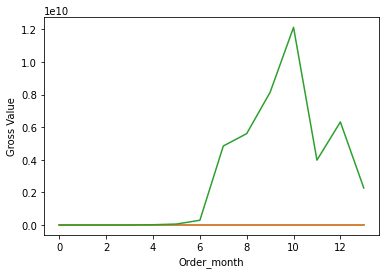

In [36]:
plt.plot(m)
plt.xlabel("Order_month")
plt.ylabel("Gross Value")

## Gross Value by CoCd (organisation code)

In [37]:
dt = df.groupby(['CoCd'],as_index=False)['Gross value'].sum()
dt['Percent'] = (dt['Gross value']/dt['Gross value'].sum()) * 100
dt = dt.sort_values(by=['Gross value'],ascending =False)
dt

,CoCd,Gross value,Percent
2,7860,27948556402.23,64.02
4,9000,15106757732.89,34.61
0,4500,337237640.35,0.77
3,8000,161323065.60,0.37
1,7000,99188551.73,0.23


### Above data shows that 64% of the orders came in from one organisation (7860)
### Lets try to get a year wise break down of the above data

In [38]:
dt = df.groupby(['CoCd' , 'Order_year'],as_index=False)['Gross value'].sum()
dt['Percent'] = (dt['Gross value']/dt['Gross value'].sum()) * 100
dt = dt.sort_values(by=['Gross value'],ascending =False)
dt

,CoCd,Order_year,Gross value,Percent
5,7860,2019,17336757619.15,39.71
4,7860,2018,10611798783.08,24.31
8,9000,2018,7986378184.50,18.30
9,9000,2019,7120379548.39,16.31
0,4500,2018,231821801.17,0.53
1,4500,2019,105415839.18,0.24
6,8000,2018,84260694.60,0.19
7,8000,2019,77062371.00,0.18
3,7000,2019,51366124.75,0.12
2,7000,2018,47822426.98,0.11


### Above data shows that in both the year (7860) was the highest gross value contributor

## Checking to see from which storage location most orders come in

In [39]:
dt = df.groupby(['SLoc' , 'Order_year'],as_index=False)['Gross value'].sum()
dt['Percent'] = (dt['Gross value']/dt['Gross value'].sum()) * 100
dt.sort_values(by=['Gross value'],ascending =False)

,SLoc,Order_year,Gross value,Percent
2334,CGEN,2019,13677587552.31,31.33
2333,CGEN,2018,7484570987.31,17.15
267,9101,2019,2249192387.02,5.15
268,9102,2018,2139031704.65,4.90
266,9101,2018,1310332234.16,3.00
...,...,...,...,...
1016,AJBG,2019,1797.00,0.00
2393,IMPT,2018,1224.00,0.00
92,1100,2018,45.00,0.00
104,1300,2018,22.00,0.00


## Insight on Item name to understand which Item were highest contributor in gross value

In [40]:
ds = df.groupby(['Short Text'],as_index=False)['Gross value'].sum()
ds = ds.sort_values(by=['Gross value'],ascending =False)
ds['Percent'] = (ds['Gross value']/dt['Gross value'].sum()) * 100
ds['Percent_cum_sum'] = ds['Percent'].cumsum()
dms=ds.head(22)
top_items=dms['Short Text'].values
ds.head(22)

,Short Text,Gross value,Percent,Percent_cum_sum
5260,IB Ross Broiler Finisher Feed,4285259626.41,9.82,9.82
5262,IB Ross Broiler Starter Feed,3209562870.62,7.35,17.17
8950,Soya Bean - (MP),2946923148.36,6.75,23.92
6205,Maize,2942718145.02,6.74,30.66
8948,Soya Bean - (A),2227880477.51,5.10,35.76
1670,B4 IB Ross Feed,1885743710.30,4.32,40.08
7108,PL-3,1585072140.25,3.63,43.72
5261,IB Ross Broiler Pre-Starter Feed,1572320782.00,3.60,47.32
7109,PL-4,1532820171.13,3.51,50.83
8947,Soya Bean,1512892852.96,3.47,54.29


### Above table gives us the list of top 22 items contributing to 81.11% of gross value

## Insight on material group name to understand which material group were highest contributor in gross value

In [41]:
dm = df.groupby(['Matl Group'],as_index=False)['Gross value'].sum()
dm = dm.sort_values(by=['Gross value'],ascending =False)
dm['Percent'] = (dm['Gross value']/dm['Gross value'].sum()) * 100
dm['Cumulative_Percent'] = dm['Percent'].cumsum()
dm.head(10)

,Matl Group,Gross value,Percent,Cumulative_Percent
64,1500,27065031311.17,62.00,62.00
80,2003,6784818008.33,15.54,77.54
95,2211,4400450570.92,10.08,87.62
83,2007,1224449449.57,2.80,90.43
103,2353,455387569.50,1.04,91.47
41,1330,365561982.67,0.84,92.31
93,2209,291225000.00,0.67,92.98
82,2006,241512017.00,0.55,93.53
89,2204,230239274.53,0.53,94.06
96,2214,202514377.20,0.46,94.52


### Above table shows us that majority of gross value is contributed by "Matl Group - 1500". Lets get further insights into material 1500

In [42]:
mg=df[df['Matl Group'] == "1500"][['Matl Group','Purch.Doc.','Changed On', 'Short Text','CoCd','PO Quantity','Net Price','Gross value']]
dm = mg.groupby(['Short Text'],as_index=False)['Gross value'].sum()
dm = dm.sort_values(by=['Gross value'],ascending =False)
dm['Percent'] = (dm['Gross value']/dm['Gross value'].sum()) * 100
dm['Cumulative_Percent'] = dm['Percent'].cumsum()
dm.head(15)

,Short Text,Gross value,Percent,Cumulative_Percent
28,IB Ross Broiler Finisher Feed,4285259626.41,15.83,15.83
30,IB Ross Broiler Starter Feed,3209562870.62,11.86,27.69
3,B4 IB Ross Feed,1885743710.30,6.97,34.66
38,PL-3,1585072140.25,5.86,40.52
29,IB Ross Broiler Pre-Starter Feed,1572320782.00,5.81,46.33
39,PL-4,1532820171.13,5.66,51.99
12,Feed P1,1398164785.15,5.17,57.15
40,PL-5,1327971730.15,4.91,62.06
0,B1 IB Ross Feed,1308304925.95,4.83,66.90
1,B2 IB Ross Feed,1268506680.45,4.69,71.58


## From the above table it can determined that Material group 1500 is the highest contributor to gross value (62%). From material group 1500 -  50% contribution comes from  these 6 items - IB Ross Broiler Finisher Feed-15.83% ,  IB Ross Broiler Starter Feed-11.86% , B4 IB Ross Feed-6.97% , PL-3-5.86, IB Ross Broiler Pre-Starter Feed-5.81%,PL-4-5.66%	

### Lets get further insights into material 2300 since it is the second highest contributor with 15.54% contribution to the gross value

In [43]:
mg=df[df['Matl Group'] == "2003"][['Matl Group','Purch.Doc.','Changed On', 'Short Text','CoCd','PO Quantity','Net Price','Gross value']]
dm = mg.groupby(['Short Text'],as_index=False)['Gross value'].sum()
dm = dm.sort_values(by=['Gross value'],ascending =False)
dm['Percent'] = (dm['Gross value']/dm['Gross value'].sum()) * 100
dm['Cumulative_Percent'] = dm['Percent'].cumsum()
dm.head(15)

,Short Text,Gross value,Percent,Cumulative_Percent
3,Soya Bean - (MP),2946923148.36,43.43,43.43
1,Soya Bean - (A),2227880477.51,32.84,76.27
0,Soya Bean,1512892852.96,22.30,98.57
2,Soya Bean - (BH),96439614.46,1.42,99.99
4,Soya Bean - (NCDX),681915.04,0.01,100.00


### Above table shows the top 3 items that contribute to 98.5% material 2300's gross value

### Lets get further insights into material 2211 since it is the second highest contributor with 10.08% contribution to the gross value

In [44]:
mg=df[df['Matl Group'] == "2211"][['Matl Group','Purch.Doc.','Changed On', 'Short Text','CoCd','PO Quantity','Net Price','Gross value']]
dm = mg.groupby(['Short Text'],as_index=False)['Gross value'].sum()
dm = dm.sort_values(by=['Gross value'],ascending =False)
dm['Percent'] = (dm['Gross value']/dm['Gross value'].sum()) * 100
dm['Cumulative_Percent'] = dm['Percent'].cumsum()
dm.head(15)

,Short Text,Gross value,Percent,Cumulative_Percent
23,Maize,2942718145.02,66.87,66.87
20,Khandha,501325985.40,11.39,78.27
28,Nakki,167209809.87,3.80,82.07
24,Maize Gluten,151740812.85,3.45,85.51
6,Deo Oil Rice Brand(DORB),137460037.10,3.12,88.64
27,Mono Calsium phosphat (MCP),127508006.49,2.90,91.54
17,Ground nut cake (G.N.C),103435463.15,2.35,93.89
32,Rape seed DOC,56682463.70,1.29,95.17
4,Cattle Feed,33903705.00,0.77,95.94
10,Fish Meal Powder (SHM),22546882.10,0.51,96.46


### Above table shows the top 6 items that contribute to 91.54% material 2211's gross value

# Now that we have got an fair idea about the top contributors to the gross value. Let's try to get an insight on the quantity of this orders for which we'll be using the PO quantity column

In [45]:
#Lets check the purchase order which contains items top 22 items 
df[df['Short Text'].isin(top_items)]['Purch.Doc.'].value_counts().head()

7600179103    9
7600175178    7
7600171670    7
7600182497    7
7600176890    7
Name: Purch.Doc., dtype: int64

In [46]:
#Check the highest  ordered items
df[df['Purch.Doc.'] == 7600179103][['Purch.Doc.','Changed On', 'Short Text','CoCd','PO Quantity','Net Price','Gross value']]

,Purch.Doc.,Changed On,Short Text,CoCd,PO Quantity,Net Price,Gross value
110686,7600179103,2019-04-09,IB Ross Broiler Pre-Starter Feed,7860,222000.00,33.15,7359300.00
110687,7600179103,2019-04-09,IB Ross Broiler Starter Feed,7860,420000.00,31.80,13356000.00
110688,7600179103,2019-04-09,IB Ross Broiler Finisher Feed,7860,508447.00,30.74,15629660.78
110689,7600179103,2019-04-09,IB Ross Broiler Pre-Starter Feed,7860,92500.00,33.15,3066375.00
110690,7600179103,2019-04-09,IB Ross Broiler Starter Feed,7860,175000.00,31.80,5565000.00
110691,7600179103,2019-04-09,IB Ross Broiler Finisher Feed,7860,211853.00,30.74,6512361.22
110692,7600179103,2019-04-09,IB Ross Broiler Pre-Starter Feed,7860,55500.00,33.15,1839825.00
110693,7600179103,2019-04-09,IB Ross Broiler Starter Feed,7860,105000.00,31.80,3339000.00
110694,7600179103,2019-04-09,IB Ross Broiler Finisher Feed,7860,127112.00,30.74,3907422.88


In [47]:
#Check the lowest ordered items
df[df['Short Text'].isin(top_items)]['Purch.Doc.'].value_counts().tail()

9400130966    1
9400130967    1
9400130968    1
9400130969    1
9400141355    1
Name: Purch.Doc., dtype: int64

In [48]:

df[df['Purch.Doc.'] == 9400130966][['Purch.Doc.','Changed On', 'Short Text','CoCd','PO Quantity','Net Price','Gross value']]

,Purch.Doc.,Changed On,Short Text,CoCd,PO Quantity,Net Price,Gross value
50225,9400130966,2018-11-18,Maize,9000,4536.69,14.25,64647.88


# Preparing data for clustering. We'll be using Gross value and frequncy to prepare clusters

In [49]:
df_cluster = df.groupby('Short Text',as_index=False).agg(
    Frequency=('Purch.Doc.','count'), 
    TotalGrossValue=('Gross value','sum'))


df_cluster.head(10)

,Short Text,Frequency,TotalGrossValue
0,"""1/4 Ratchet 7-13mm Nuts",1,10250.00
1,"""IND. Air Heating Ele. 2000 w ,240 V""",1,9880.00
2,'biquiti - AirGrid M5 Hi-Power 27dbi,2,26400.00
3,0028330 Frt.Bonnet Hings Kabja LH Bolero,1,719.00
4,0028334 Frt.Bonnet Hings Kabja RH Bolero,1,3440.00
5,0028434 Frt Wheel Arch LH(Mudgurd)Bolero,1,717.00
6,0028434 Frt Wheel Arch RH(Mudgurd)Bolero,1,717.00
7,006000454F91 Assy Air Filter (Donaldson),3,6963.00
8,006019167C1 Air Filter PRI.M.LODER TRAC.,1,2544.00
9,006503934B91 Diff.Oil Seal M&M Tractor,1,260.00


## List of Items with maximum gross value

In [50]:
df_cluster.sort_values(by=['TotalGrossValue'],ascending =False).head(10)

,Short Text,Frequency,TotalGrossValue
5260,IB Ross Broiler Finisher Feed,14976,4285259626.41
5262,IB Ross Broiler Starter Feed,13294,3209562870.62
8950,Soya Bean - (MP),6928,2946923148.36
6205,Maize,8317,2942718145.02
8948,Soya Bean - (A),4801,2227880477.51
1670,B4 IB Ross Feed,65,1885743710.30
7108,PL-3,97,1585072140.25
5261,IB Ross Broiler Pre-Starter Feed,10189,1572320782.00
7109,PL-4,86,1532820171.13
8947,Soya Bean,7341,1512892852.96


## List of Items with highest frequency


In [51]:
df_cluster.sort_values(by=['Frequency'],ascending =False).head(10)

,Short Text,Frequency,TotalGrossValue
5260,IB Ross Broiler Finisher Feed,14976,4285259626.41
5262,IB Ross Broiler Starter Feed,13294,3209562870.62
5261,IB Ross Broiler Pre-Starter Feed,10189,1572320782.00
6205,Maize,8317,2942718145.02
8947,Soya Bean,7341,1512892852.96
8950,Soya Bean - (MP),6928,2946923148.36
8948,Soya Bean - (A),4801,2227880477.51
8230,Rice Bran Boiled,4193,281158471.45
8232,Rice Bran Raw,3113,173428290.50
8235,Rice Husk (New),2599,112143061.64


## Month wise top item

In [52]:
dm = df.groupby(['Order_year','Order_month','Short Text'])['Gross value'].sum().reset_index(name='Gross value')
dm = dm.sort_values('Gross value', ascending=False).drop_duplicates(['Order_year','Order_month'])
dm = dm.sort_values(['Order_year','Order_month'], ascending=[True,True])
dm

,Order_year,Order_month,Short Text,Gross value
22,2018,3,Ring Die 1.0mm Pellet Mill MUZL1200Ø,6100.00
28,2018,4,Brewers Yeast (Golden),22000.00
30,2018,5,Complete Drinking System,85800.00
39,2018,6,Close Type Sheds Monotering with Control,1410000.00
86,2018,7,"Tata LPK 1615/36, BS-IV",8300781.25
152,2018,8,Soya Bean - (A),19009196.54
687,2018,9,Maize,50105726.11
2713,2018,10,IB Ross Broiler Finisher Feed,525061102.68
6460,2018,11,Soya Bean - (MP),963252604.33
8689,2018,12,Maize,1007558949.77


# Creating cluster to identify patterns

In [53]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [54]:
# Scale data
#can try minmmax scaler, etc

df_t = df_cluster.drop(['Short Text'], axis='columns')
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df_t) # its an array 
df_scaled = pd.DataFrame(df_scaled, columns = df_t.columns) # convert back to data frame
df_scaled.head()

,Frequency,TotalGrossValue
0,-0.04,-0.05
1,-0.04,-0.05
2,-0.03,-0.05
3,-0.04,-0.05
4,-0.04,-0.05


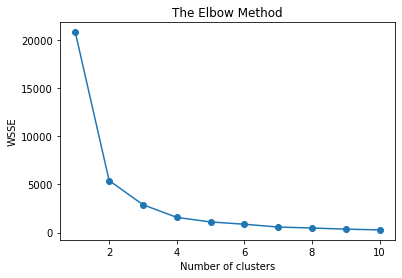

In [55]:
#using the elbow method to find the potimal number of clusters
from sklearn.cluster import KMeans

wsse=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, random_state =10) #random state is used to set seed
    kmeans.fit(df_scaled)
    wsse.append(kmeans.inertia_) #kmeans.inertia_ is the WSSE calculation
plt.plot(range(1,11),wsse, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()
#Since it can be seen that last elbow is at 4 we will use K=4 i.e 4 number of clusters

In [56]:
kmeans= KMeans(n_clusters=4, random_state=10)
Y_pred=kmeans.fit_predict(df_scaled)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
print(kmeans.inertia_) #WSSE when k=4
print(kmeans.n_iter_) #to check number of iteration model took to reach zero convergance

1582.7160121056572
3


In [58]:
#Adding the cluster number column in the dataset
df_cluster["Cluster"]=Y_pred
df_cluster.head(10)

,Short Text,Frequency,TotalGrossValue,Cluster
0,"""1/4 Ratchet 7-13mm Nuts",1,10250.00,0
1,"""IND. Air Heating Ele. 2000 w ,240 V""",1,9880.00,0
2,'biquiti - AirGrid M5 Hi-Power 27dbi,2,26400.00,0
3,0028330 Frt.Bonnet Hings Kabja LH Bolero,1,719.00,0
4,0028334 Frt.Bonnet Hings Kabja RH Bolero,1,3440.00,0
5,0028434 Frt Wheel Arch LH(Mudgurd)Bolero,1,717.00,0
6,0028434 Frt Wheel Arch RH(Mudgurd)Bolero,1,717.00,0
7,006000454F91 Assy Air Filter (Donaldson),3,6963.00,0
8,006019167C1 Air Filter PRI.M.LODER TRAC.,1,2544.00,0
9,006503934B91 Diff.Oil Seal M&M Tractor,1,260.00,0


In [59]:
df_cluster['Cluster'].value_counts()

0    10391
2       13
1        5
3        2
Name: Cluster, dtype: int64

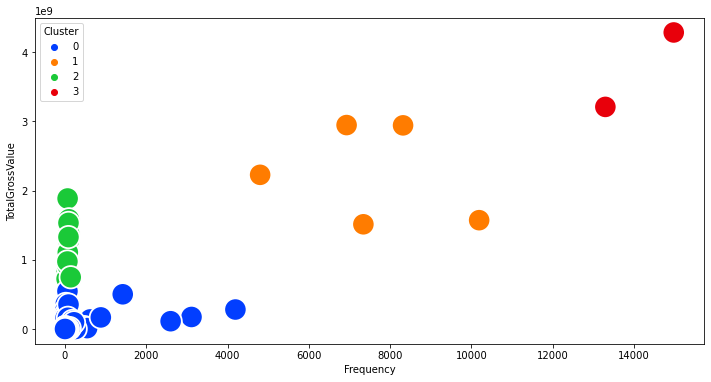

In [60]:
#can try different visualization
##try visualizing log values instead of absolute values
###try scaling data diffrently
plt.figure(figsize = (12, 6))
sns.scatterplot(data=df_cluster, x="Frequency", y="TotalGrossValue", hue="Cluster",palette="bright",s=500);

In [61]:
#summary of clusters
df_summmary = df_cluster.groupby('Cluster',as_index=False).agg(
    Avg_NumTimesBought=('Frequency','mean'),
    Avg_GrossValue=('TotalGrossValue','mean'),)

df_summmary

,Cluster,Avg_NumTimesBought,Avg_GrossValue
0,0,4.78,897857.75
1,1,7515.20,2240547081.17
2,2,80.46,1201989664.23
3,3,14135.00,3747411248.51


In [62]:
from sklearn.preprocessing import MinMaxScaler
# define data
df_t = df_cluster.drop(['Short Text'], axis='columns')
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_t) # its an array 
df_scaled = pd.DataFrame(df_scaled, columns = df_t.columns) # convert back to data frame
df_scaled.head()

,Frequency,TotalGrossValue,Cluster
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,0.00,0.00,0.00
3,0.00,0.00,0.00
4,0.00,0.00,0.00


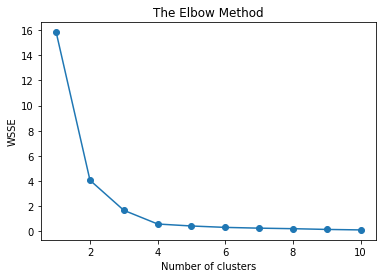

In [63]:
#using the elbow method to find the potimal number of clusters
from sklearn.cluster import KMeans

wsse=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, random_state =10) #random state is used to set seed
    kmeans.fit(df_scaled)
    wsse.append(kmeans.inertia_) #kmeans.inertia_ is the WSSE calculation
plt.plot(range(1,11),wsse, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()
#Since it can be seen that last elbow is at 4 we will use K=4 i.e 4 number of clusters

In [64]:
kmeans= KMeans(n_clusters=4, random_state=10)
Y_pred=kmeans.fit_predict(df_scaled)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
#Adding the cluster number column in the dataset
df_scaled["Cluster"]=Y_pred
df_scaled.head(10)

,Frequency,TotalGrossValue,Cluster
0,0.00,0.00,0
1,0.00,0.00,0
2,0.00,0.00,0
3,0.00,0.00,0
4,0.00,0.00,0
5,0.00,0.00,0
6,0.00,0.00,0
7,0.00,0.00,0
8,0.00,0.00,0
9,0.00,0.00,0


In [66]:
df_scaled["Cluster"].value_counts()

0    10391
1       13
2        5
3        2
Name: Cluster, dtype: int64

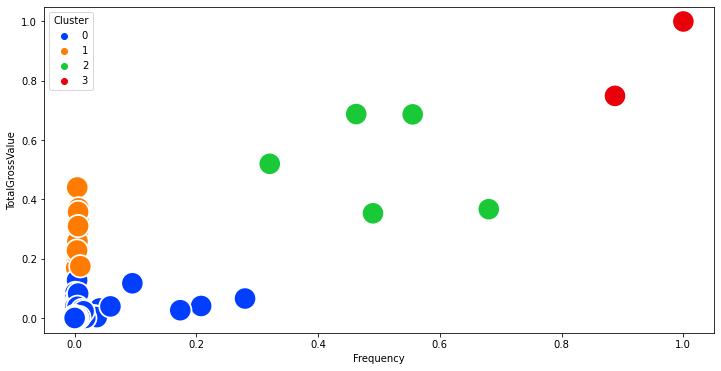

In [67]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data=df_scaled, x="Frequency", y="TotalGrossValue", hue="Cluster",palette="bright",s=500);

In [68]:
df_t = df_cluster.drop(['Short Text'], axis='columns')
scaler = preprocessing.RobustScaler()
df_scaled = scaler.fit_transform(df_t) # its an array 
df_scaled = pd.DataFrame(df_scaled, columns = df_t.columns) # convert back to data frame
df_scaled.head()

,Frequency,TotalGrossValue,Cluster
0,0.00,0.18,0.00
1,0.00,0.16,0.00
2,1.00,0.76,0.00
3,0.00,-0.17,0.00
4,0.00,-0.07,0.00


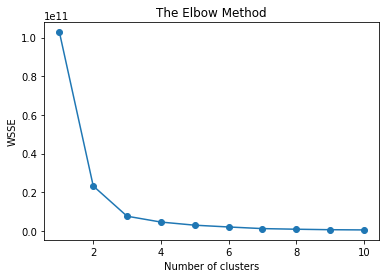

In [69]:
#using the elbow method to find the potimal number of clusters
from sklearn.cluster import KMeans

wsse=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, random_state =10) #random state is used to set seed
    kmeans.fit(df_scaled)
    wsse.append(kmeans.inertia_) #kmeans.inertia_ is the WSSE calculation
plt.plot(range(1,11),wsse, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()
#Since it can be seen that last elbow is at 4 we will use K=4 i.e 4 number of clusters

In [70]:
kmeans= KMeans(n_clusters=3, random_state=10)
Y_pred=kmeans.fit_predict(df_scaled)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
#Adding the cluster number column in the dataset
df_scaled["Cluster"]=Y_pred
df_scaled.head(10)

,Frequency,TotalGrossValue,Cluster
0,0.00,0.18,0
1,0.00,0.16,0
2,1.00,0.76,0
3,0.00,-0.17,0
4,0.00,-0.07,0
5,0.00,-0.17,0
6,0.00,-0.17,0
7,2.00,0.06,0
8,0.00,-0.10,0
9,0.00,-0.19,0


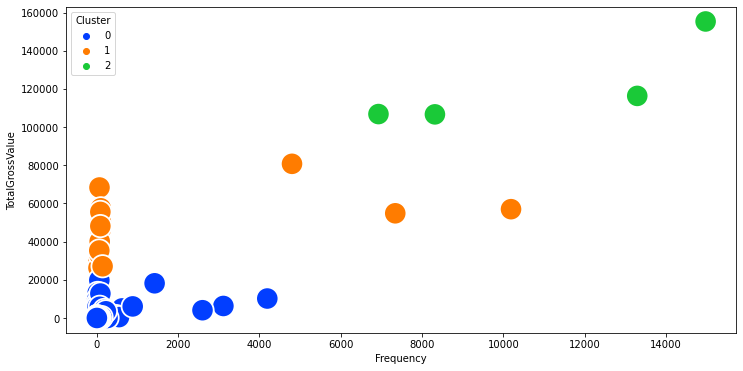

In [72]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data=df_scaled, x="Frequency", y="TotalGrossValue", hue="Cluster",palette="bright",s=500);

## Cluster wise analysis

### Cluster 0

In [73]:
df_cluster[df_cluster['Cluster'] == 0].head(10)

,Short Text,Frequency,TotalGrossValue,Cluster
0,"""1/4 Ratchet 7-13mm Nuts",1,10250.00,0
1,"""IND. Air Heating Ele. 2000 w ,240 V""",1,9880.00,0
2,'biquiti - AirGrid M5 Hi-Power 27dbi,2,26400.00,0
3,0028330 Frt.Bonnet Hings Kabja LH Bolero,1,719.00,0
4,0028334 Frt.Bonnet Hings Kabja RH Bolero,1,3440.00,0
5,0028434 Frt Wheel Arch LH(Mudgurd)Bolero,1,717.00,0
6,0028434 Frt Wheel Arch RH(Mudgurd)Bolero,1,717.00,0
7,006000454F91 Assy Air Filter (Donaldson),3,6963.00,0
8,006019167C1 Air Filter PRI.M.LODER TRAC.,1,2544.00,0
9,006503934B91 Diff.Oil Seal M&M Tractor,1,260.00,0


### Cluster 1

In [74]:
df_cluster[df_cluster['Cluster'] == 1].head(10)

,Short Text,Frequency,TotalGrossValue,Cluster
5261,IB Ross Broiler Pre-Starter Feed,10189,1572320782.00,1
6205,Maize,8317,2942718145.02,1
8947,Soya Bean,7341,1512892852.96,1
8948,Soya Bean - (A),4801,2227880477.51,1
8950,Soya Bean - (MP),6928,2946923148.36,1


### Cluster 2

In [75]:
df_cluster[df_cluster['Cluster'] == 2].head(10)

,Short Text,Frequency,TotalGrossValue,Cluster
1665,B1 IB Ross Feed,113,1308304925.95,2
1667,B2 IB Ross Feed,89,1268506680.45,2
1668,B3 IB Ross Feed,70,1106723387.40,2
1670,B4 IB Ross Feed,65,1885743710.30,2
2370,C2,43,843559539.05,2
4142,Feed P1,97,1398164785.15,2
4498,GP-4 Feed,40,723860344.45,2
4499,GP-5 Feed,59,922647277.25,2
4767,Grand Parents Layer,60,975086117.95,2
7108,PL-3,97,1585072140.25,2


### Cluster 3

In [76]:
df_cluster[df_cluster['Cluster'] == 3].head(10)

,Short Text,Frequency,TotalGrossValue,Cluster
5260,IB Ross Broiler Finisher Feed,14976,4285259626.41,3
5262,IB Ross Broiler Starter Feed,13294,3209562870.62,3


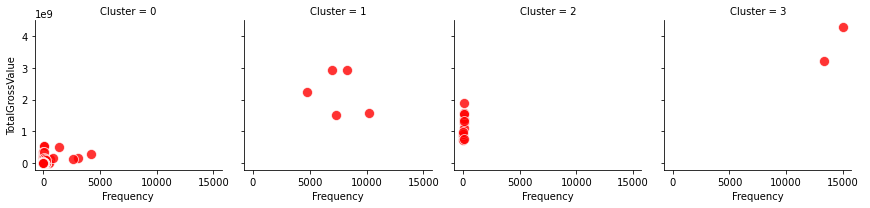

In [77]:
g = sns.FacetGrid(df_cluster, col='Cluster')
g.map(sns.scatterplot, "Frequency", "TotalGrossValue", s=100, alpha=.8,color='red',x_jitter=.1)
g.add_legend();

In [78]:
df_final = df.merge(df_cluster, on='Short Text', how='left')
df_final.head()

,Purch.Doc.,Item,Changed On,Short Text,Material,CoCd,Plnt,SLoc,Matl Group,PO Quantity,Net Price,Per,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Price Date,Effective value,PTm,Profit Ctr,MTyp,NCM Code,Priority (Material Required Within),Priority,Section,Order_year,Order_month,Frequency,TotalGrossValue,Cluster
0,1000007270,10,2018-03-24,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.00,9000,9110,CGEN,1310,1.00,4400.00,1,4400.00,4400.00,0,0,2018-03-24,0.00,0,0000009110,YGEN,84369900,7,Medium,Maintenance,2018,3,1,4400.00,0
1,1000007270,20,2018-03-24,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969020.00,9000,9110,CGEN,1310,1.00,6100.00,1,6100.00,6100.00,0,0,2018-03-24,0.00,0,0000009110,YGEN,84369900,7,Medium,Maintenance,2018,3,1,6100.00,0
2,1000007299,10,2018-09-29,Tata LPT 909/38/Cab,815810.00,9000,9110,CGEN,ASSETS,11.00,823472.00,1,9058192.00,9058192.00,0,0,2018-05-07,0.00,0,0000009110,YCGM,8704,0,Normal,0,2018,9,1,9058192.00,0
3,1000007299,40,2018-09-29,"Tata LPT 1412 CRX, BS-IV, 48, SHDLB, 12.",816630.00,9000,9110,CGEN,ASSETS,10.00,1167969.00,1,11679690.00,11679690.00,0,0,2018-05-07,0.00,0,0000009110,YCGM,8704,0,Normal,0,2018,9,1,11679690.00,0
4,1000007320,10,2018-12-07,Material for Prefabricated buildings,814720.00,9000,9406,CGEN,1342,1.00,2096100.97,1,2096100.97,2096100.97,0,0,2018-05-18,0.00,0,0000009406,YCGM,9406,0,Normal,0,2018,12,6,6776226.16,0


In [79]:
df_final['Cluster'].value_counts()

0    49671
1    37576
3    28270
2     1046
Name: Cluster, dtype: int64

## Naming the cluster

In [80]:
df_final['Cluster_names']=df_final.Cluster.map({0:"Very Low Freq Very Low Value",1:"Medium Freq Medium Value",2:"Low Freq Low Value",3:"High Freq High Value"}) 
df_final['Cluster_names'].value_counts()

Very Low Freq Very Low Value    49671
Medium Freq Medium Value        37576
High Freq High Value            28270
Low Freq Low Value               1046
Name: Cluster_names, dtype: int64

In [81]:
df_final.head()

,Purch.Doc.,Item,Changed On,Short Text,Material,CoCd,Plnt,SLoc,Matl Group,PO Quantity,Net Price,Per,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Price Date,Effective value,PTm,Profit Ctr,MTyp,NCM Code,Priority (Material Required Within),Priority,Section,Order_year,Order_month,Frequency,TotalGrossValue,Cluster,Cluster_names
0,1000007270,10,2018-03-24,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.00,9000,9110,CGEN,1310,1.00,4400.00,1,4400.00,4400.00,0,0,2018-03-24,0.00,0,0000009110,YGEN,84369900,7,Medium,Maintenance,2018,3,1,4400.00,0,Very Low Freq Very Low Value
1,1000007270,20,2018-03-24,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969020.00,9000,9110,CGEN,1310,1.00,6100.00,1,6100.00,6100.00,0,0,2018-03-24,0.00,0,0000009110,YGEN,84369900,7,Medium,Maintenance,2018,3,1,6100.00,0,Very Low Freq Very Low Value
2,1000007299,10,2018-09-29,Tata LPT 909/38/Cab,815810.00,9000,9110,CGEN,ASSETS,11.00,823472.00,1,9058192.00,9058192.00,0,0,2018-05-07,0.00,0,0000009110,YCGM,8704,0,Normal,0,2018,9,1,9058192.00,0,Very Low Freq Very Low Value
3,1000007299,40,2018-09-29,"Tata LPT 1412 CRX, BS-IV, 48, SHDLB, 12.",816630.00,9000,9110,CGEN,ASSETS,10.00,1167969.00,1,11679690.00,11679690.00,0,0,2018-05-07,0.00,0,0000009110,YCGM,8704,0,Normal,0,2018,9,1,11679690.00,0,Very Low Freq Very Low Value
4,1000007320,10,2018-12-07,Material for Prefabricated buildings,814720.00,9000,9406,CGEN,1342,1.00,2096100.97,1,2096100.97,2096100.97,0,0,2018-05-18,0.00,0,0000009406,YCGM,9406,0,Normal,0,2018,12,6,6776226.16,0,Very Low Freq Very Low Value


## Very Low Freq Very Low Value items

In [82]:
items_in_Cluster0 = pd.DataFrame(df_final[df_final['Cluster_names'].isin(["Very Low Freq Very Low Value"])])['Short Text'].unique()
items_in_Cluster0

array(['Ring Die 1.2mm Pellet Mill MUZL1200Ø',
       'Ring Die 1.0mm Pellet Mill MUZL1200Ø', 'Tata LPT 909/38/Cab', ...,
       'HT Bolt 14X65 mm', 'Return Roller - BC700',
       'Carring Roller - BC600'], dtype=object)

## Medium Freq Medium Value items

In [83]:
items_in_Cluster1 = pd.DataFrame(df_final[df_final['Cluster_names'].isin(["Medium Freq Medium Value"])])['Short Text'].unique()
items_in_Cluster1

array(['IB Ross Broiler Pre-Starter Feed', 'Soya Bean - (A)', 'Soya Bean',
       'Soya Bean - (MP)', 'Maize'], dtype=object)

##  Low Freq Low Value items

In [84]:
items_in_Cluster2 = pd.DataFrame(df_final[df_final['Cluster_names'].isin(["Low Freq Low Value"])])['Short Text'].unique()
items_in_Cluster2

array(['Feed P1', 'PL-3', 'PL-4', 'PL-5', 'GP-5 Feed',
       'Grand Parents Layer', 'B1 IB Ross Feed', 'B2 IB Ross Feed',
       'B3 IB Ross Feed', 'B4 IB Ross Feed', 'GP-4 Feed', 'C2',
       'Soya Crude Oil - Purchase'], dtype=object)

## High Freq High Value items

In [85]:
items_in_Cluster3 = pd.DataFrame(df_final[df_final['Cluster_names'].isin(["High Freq High Value"])])['Short Text'].unique()
items_in_Cluster3

array(['IB Ross Broiler Finisher Feed', 'IB Ross Broiler Starter Feed'],
      dtype=object)

## Priority Items Analysis

In [86]:
Very_High_Priority_items = pd.DataFrame(df_final[df_final['Priority'].isin(["Very High"])])['Short Text'].unique()
Very_High_Priority_items

array(['RM Vale Appratus (Borosil)',
       'Water Bath Digital (6 Hole) 5-100"C', 'Desicator 210 mm',
       'Magnetic Stirrer with Hot Plate', 'Weighing Balance',
       'Vernier Calliper', 'Laminar Air Flow', 'Trichloroacetic Acid',
       'COPPER ACETATE(DAIRY LAB)', 'MOLYBDIC ACID',
       'SILVER NITRATE DAIRY LAB)', 'Amber colour bottle 1000 ML',
       'Colourless Bottle, 2000 ML', 'TLMB 8"X 10" Pouch',
       'TLMB 6"X 7" Pouch', 'TLMB 9"X 11" Pouch', 'TLMB 5"X 6" Pouch',
       'Pipette Graduated 2ML', 'Iodine Flask, 500 ML',
       'Colourless Bottle, 250 ML',
       'Saf skinPurple Hand Gloves Tar.-370020',
       'Barrit Reagent - A (R-029) 100ml',
       'Barrit Reagent - B (R-030) 100ml', 'Rose Bengal Agar',
       'Violet Red Bile Agar', 'Maximum Recovery Diluent', 'Iodine',
       'Lime', 'Lime Dust', 'Acify', 'Neo-Dox', 'Animunin LIQ.',
       'AMPROLIUM 20%', 'Toxol liq.', 'VENKASIN 100ML', 'B.V.JENTA 100ML',
       'Gumboro Inter.', 'Gumboro Plus', 'Gumboro Inter.(2

In [87]:
High_Priority_items = pd.DataFrame(df_final[df_final['Priority'].isin(["High"])])['Short Text'].unique()
High_Priority_items

array(['MS Pipe 1.25" B Class 3.2 mm, 3.1 kg / m', 'Sall Wood',
       'Babul Wood', ..., 'Corn Starch (food Grade)',
       '40/304179 Wheel Nut(Hub Nut) Jcb',
       '403799529803790 Power Strg.Pump JCB'], dtype=object)

In [88]:
Medium_Priority_items = pd.DataFrame(df_final[df_final['Priority'].isin(["Medium"])])['Short Text'].unique()
Medium_Priority_items

array(['Ring Die 1.2mm Pellet Mill MUZL1200Ø',
       'Ring Die 1.0mm Pellet Mill MUZL1200Ø',
       'Design Manufacturing & Supply of', ..., 'HT Bolt 14X65 mm',
       'Return Roller - BC700', 'Carring Roller - BC600'], dtype=object)

In [89]:
Low_Priority_items = pd.DataFrame(df_final[df_final['Priority'].isin(["Low"])])['Short Text'].unique()
Low_Priority_items

array(['Design Manufacturing & Supply of', 'Flam Proof Motor - 5 Hp',
       'Pump Model: Mega G 80/200', ..., 'Bearing Sleev H-315',
       'Bearing Sleeve - H 320', 'Bearing 6203 Zz/C3'], dtype=object)

## Based on the above Clusters we are going to use the most frequent items to check if there's any cost saving opportunity - 
### IB Ross Broiler Finisher Feed
### IB Ross Broiler Starter Feed
### IB Ross Broiler Pre-Starter Feed
### Maize

In [90]:
#creating day and week column to understand price trend on a daily and weekly basis
df_final['Order_day'] = df_final['Changed On'].dt.day
df_final['Week_Number'] = df_final['Changed On'].dt.isocalendar().week

In [91]:
#checking monthwise purchase trend
pd.crosstab(df_final['Order_year'],df_final['Order_month'],margins='row')

Order_month,1,2,3,4,5,6,7,8,9,10,11,12,All
Order_year,,,,,,,,,,,,,
2018,0,0,29,2,9,17,42,129,1749,18590,18402,21063,60032
2019,21379,17582,17069,501,0,0,0,0,0,0,0,0,56531
All,21379,17582,17098,503,9,17,42,129,1749,18590,18402,21063,116563


In [92]:
#creating subset for each product
IB_Ross_Broiler_Finisher_Feed = df_final.loc[(df_final["Short Text"] == "IB Ross Broiler Finisher Feed")]
print(IB_Ross_Broiler_Finisher_Feed.shape)

IB_Ross_Broiler_Starter_Feed = df_final.loc[(df_final["Short Text"] == "IB Ross Broiler Starter Feed")]
print(IB_Ross_Broiler_Starter_Feed.shape)

IB_Ross_Broiler_Pre_Starter_Feed = df_final.loc[(df_final["Short Text"] == "IB Ross Broiler Pre-Starter Feed")]
print(IB_Ross_Broiler_Pre_Starter_Feed.shape)

Maize = df_final.loc[(df_final["Short Text"] == "Maize")]
print(Maize.shape)

(14976, 33)
(13294, 33)
(10189, 33)
(8317, 33)


In [93]:
#IB_Ross_Broiler_Finisher_Feed purchase trend
pd.crosstab(IB_Ross_Broiler_Finisher_Feed['Order_year'],IB_Ross_Broiler_Finisher_Feed['Order_month'],margins='row')

Order_month,1,2,3,4,10,11,12,All
Order_year,,,,,,,,
2018,0,0,0,0,2262,2297,2390,6949
2019,2925,2480,2619,3,0,0,0,8027
All,2925,2480,2619,3,2262,2297,2390,14976


#IB_Ross_Broiler_Starter_Feed purchase trend
pd.crosstab(IB_Ross_Broiler_Starter_Feed['Order_year'],IB_Ross_Broiler_Starter_Feed['Order_month'],margins='row')

In [94]:
#IB_Ross_Broiler_Pre_Starter_Feed purchase trend
pd.crosstab(IB_Ross_Broiler_Pre_Starter_Feed['Order_year'],IB_Ross_Broiler_Pre_Starter_Feed['Order_month'],margins='row')

Order_month,1,2,3,4,10,11,12,All
Order_year,,,,,,,,
2018,0,0,0,0,1530,1653,1622,4805
2019,1921,1702,1758,3,0,0,0,5384
All,1921,1702,1758,3,1530,1653,1622,10189


In [95]:
#Maize purchase trend
pd.crosstab(Maize['Order_year'],Maize['Order_month'],margins='row')

Order_month,1,2,3,9,10,11,12,All
Order_year,,,,,,,,
2018,0,0,0,52,1276,2368,2903,6599
2019,1469,118,131,0,0,0,0,1718
All,1469,118,131,52,1276,2368,2903,8317


## Since Purchase trend shows highest purchasing is done in Dec 2018 and Jan 2019 .
## We'll do our price analysis based on Jan 2019 data since it has highest orders

In [96]:
# Creating a dataset including only Jan 2019 data 
df_jan2019 = df_final[(df_final['Order_year'] == 2019) & (df_final['Order_month'] == 1)]
df_jan2019.head()

,Purch.Doc.,Item,Changed On,Short Text,Material,CoCd,Plnt,SLoc,Matl Group,PO Quantity,Net Price,Per,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Price Date,Effective value,PTm,Profit Ctr,MTyp,NCM Code,Priority (Material Required Within),Priority,Section,Order_year,Order_month,Frequency,TotalGrossValue,Cluster,Cluster_names,Order_day,Week_Number
301,2000013052,40,2019-01-04,"Battery MHD 1500,150 AH Exide Express",808110.00,7860,1110,CGEN,1332,2.00,8959.00,1,17918.00,17918.00,0,0,2018-09-15,0.00,0,1000000999,YCGM,8507,15,Medium,bengal office,2019,1,9,179180.00,0,Very Low Freq Very Low Value,4,1
538,7500077877,10,2019-01-14,Non Chemical Egg Trays 20 LBS,7502880.00,7860,1110,CGEN,1330,480.00,240.00,1,115200.00,115200.00,0,0,2018-05-16,0.00,0,1000000999,ZGEN,4823,36,Low,0,2019,1,3,1251240.00,0,Very Low Freq Very Low Value,14,3
800,7500081673,10,2019-01-14,V Belt A-88,800870.00,7860,1110,CGEN,1212,27.00,196.35,1,5301.45,9639.00,0,0,2018-09-24,0.00,0,1000000999,YCGM,4010,18,Low,farm,2019,1,6,283239.00,0,Very Low Freq Very Low Value,14,3
858,7500081789,10,2019-01-03,Amyl Alcohol,7400030.00,7000,7070,CGEN,2400,6.50,648.00,1,4212.00,7020.00,0,0,2018-09-28,0.00,0,7000007070,ZCON,2905,2,High,lab,2019,1,3,16524.00,0,Very Low Freq Very Low Value,3,1
863,7500081799,10,2019-01-14,LED Bulb 7 W,811110.00,7860,1110,CGEN,1337,90.00,63.60,1,5724.00,5724.00,0,0,2018-09-28,0.00,0,1000000999,YCGM,85395000,4,Medium,farm,2019,1,15,438294.20,0,Very Low Freq Very Low Value,14,3


In [97]:
# Checking Weekly Average net price
s=df_jan2019[df_jan2019['Short Text'] == 'IB Ross Broiler Finisher Feed'].groupby('Week_Number')['Net Price'].mean()
s

Week_Number
1   26.64
2   26.82
3   27.28
4   28.55
5   28.80
Name: Net Price, dtype: float64

Text(0, 0.5, 'Net Price')

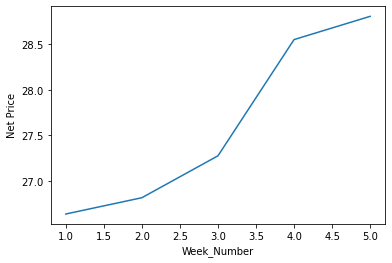

In [98]:
plt.plot(s)
plt.xlabel("Week_Number")
plt.ylabel("Net Price")

In [99]:
# Checking daily Average net price
n=df_jan2019[df_jan2019['Short Text'] == 'IB Ross Broiler Finisher Feed'].groupby('Order_day')['Net Price'].mean()
n

Order_day
1    26.19
2    28.61
3    28.11
4    26.32
5    26.77
7    27.86
8    26.33
9    28.20
10   27.99
11   26.73
12   27.52
14   26.98
15   27.31
16   28.60
17   27.37
19   27.89
21   29.16
22   27.57
23   28.29
24   28.63
25   28.87
28   28.69
29   29.71
30   28.05
31   29.41
Name: Net Price, dtype: float64

Text(0, 0.5, 'Net Price')

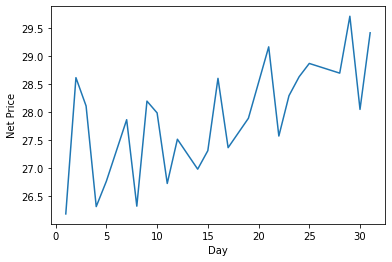

In [100]:
plt.plot(n)
plt.xlabel("Day")
plt.ylabel("Net Price")

In [101]:
#creating subsets for 2019
df_2019 = df_final[(df_final['Order_year'] == 2019)]


In [102]:
# 2019 Jan subset
jan2019 = df_final[(df_final['Order_year'] == 2019) & (df_final['Order_month'] == 1)]

## IB Ross Broiler Finisher Feed

In [103]:
#2019 Monthly summary
dt = df_2019[df_2019['Short Text'] == 'IB Ross Broiler Finisher Feed'].groupby('Order_month',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100

Finisher_feed_2019_monthly_sum = dt
Finisher_feed_2019_monthly_sum


,Order_month,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,2925,31243350.00,866507895.70,27.56,24.26,31.64,757963671.00,108544224.70,12.53
1,2,2480,26555245.00,791427794.80,29.64,26.30,32.46,698402943.50,93024851.30,11.75
2,3,2619,27983200.00,840746559.00,29.92,27.95,32.14,782130440.00,58616119.00,6.97
3,4,3,847412.00,26049444.88,30.74,30.74,30.74,26049444.88,0.00,0.00


In [104]:
#Jan 2019 weekly summary
dt = jan2019[jan2019['Short Text'] == 'IB Ross Broiler Finisher Feed'].groupby('Week_Number',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100

Finisher_feed_Jan_2019_weekly_sum = dt
Finisher_feed_Jan_2019_weekly_sum



,Week_Number,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,632,6763250.00,182328643.00,26.64,24.26,29.56,164076445.00,18252198.00,10.01
1,2,689,7233215.00,194785923.20,26.82,24.26,29.34,175477795.90,19308127.30,9.91
2,3,493,5699250.00,156349157.50,27.28,24.72,29.90,140885460.00,15463697.50,9.89
3,4,587,6103985.00,175139338.50,28.55,24.72,31.64,150890509.20,24248829.30,13.85
4,5,524,5443650.00,157904833.50,28.80,26.30,31.64,143167995.00,14736838.50,9.33


In [105]:
#Jan 2019 daily summary
dt = jan2019[jan2019['Short Text'] == 'IB Ross Broiler Finisher Feed'].groupby('Order_day',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100

Finisher_feed_Jan_2019_daily_sum = dt
Finisher_feed_Jan_2019_daily_sum

,Order_day,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,288,3077500.00,81578294.00,26.19,24.26,29.18,74660150.00,6918144.00,8.48
1,2,33,436300.00,12485340.50,28.61,27.40,29.21,11954620.00,530720.50,4.25
2,3,92,1157150.00,32505769.00,28.11,26.81,29.56,31023191.50,1482577.50,4.56
3,4,218,2080900.00,55454061.50,26.32,24.26,29.30,50482634.00,4971427.50,8.96
4,5,1,11400.00,305178.00,26.77,26.77,26.77,305178.00,0.00,0.00
5,7,16,160500.00,4469320.00,27.86,27.61,28.12,4431405.00,37915.00,0.85
6,8,331,3515850.00,93079814.00,26.33,24.26,29.30,85294521.00,7785293.00,8.36
7,9,58,547425.00,15451511.50,28.20,26.72,29.24,14627196.00,824315.50,5.33
8,10,71,839740.00,23478320.20,27.99,26.78,29.30,22488237.20,990083.00,4.22
9,11,210,2139700.00,57487057.50,26.73,24.72,29.34,52893384.00,4593673.50,7.99


Week_Number
1   26.64
2   26.82
3   27.28
4   28.55
5   28.80
Name: Net Price, dtype: float64


Text(0, 0.5, 'Net Price')

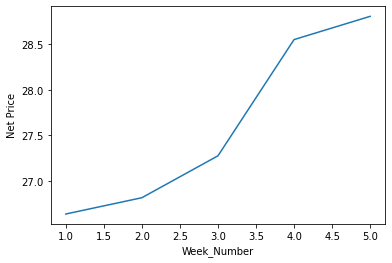

In [106]:
# plotting Weekly Average net price
s=df_jan2019[df_jan2019['Short Text'] == 'IB Ross Broiler Finisher Feed'].groupby('Week_Number')['Net Price'].mean()
print(s)
plt.plot(s)
plt.xlabel("Week_Number")
plt.ylabel("Net Price")

## IB Ross Broiler Starter Feed

In [107]:
#2019 Monthly summary
dt = df_2019[df_2019['Short Text'] == 'IB Ross Broiler Starter Feed'].groupby('Order_month',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100

Starter_feed_2019_monthly_sum = dt
Starter_feed_2019_monthly_sum


,Order_month,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,2554,21840150.00,636588504.00,28.99,26.40,32.76,576579960.00,60008544.00,9.43
1,2,2245,18996600.00,589449642.00,30.84,27.36,33.50,519746976.00,69702666.00,11.83
2,3,2310,19805400.00,616486157.50,31.03,28.96,33.16,573564384.00,42921773.50,6.96
3,4,3,700000.00,22260000.00,31.80,31.80,31.80,22260000.00,0.00,0.00


In [108]:
#Jan 2019 weekly summary
dt = jan2019[jan2019['Short Text'] == 'IB Ross Broiler Starter Feed'].groupby('Week_Number',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100

Starter_feed_Jan_2019_weekly_sum = dt
Starter_feed_Jan_2019_weekly_sum



,Week_Number,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,559,4735800.00,134634418.00,28.25,26.40,30.52,125025120.00,9609298.00,7.14
1,2,610,5128350.00,146313246.50,28.41,26.40,30.32,135388440.00,10924806.50,7.47
2,3,397,3645100.00,105772161.00,28.93,26.74,30.76,97469974.00,8302187.00,7.85
3,4,524,4374100.00,130313476.50,29.63,26.74,32.76,116963434.00,13350042.50,10.24
4,5,464,3956800.00,119555202.00,29.96,27.36,32.76,108258048.00,11297154.00,9.45


In [109]:
#Jan 2019 daily summary
dt = jan2019[jan2019['Short Text'] == 'IB Ross Broiler Starter Feed'].groupby('Order_day',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100

Starter_feed_Jan_2019_daily_sum = dt
Starter_feed_Jan_2019_daily_sum

,Order_day,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,259,2207100.00,62348420.50,28.10,26.40,30.14,58267440.00,4080980.50,6.55
1,2,30,359050.00,10630876.00,29.52,28.20,30.14,10125210.00,505666.00,4.76
2,3,73,752850.00,21806469.50,29.06,28.10,30.52,21155085.00,651384.50,2.99
3,4,194,1371800.00,38574252.00,27.95,26.40,30.26,36215520.00,2358732.00,6.11
4,5,3,45000.00,1274400.00,28.32,28.32,28.32,1274400.00,0.00,0.00
5,7,19,153950.00,4439627.50,28.79,28.12,29.05,4329074.00,110553.50,2.49
6,8,282,2424350.00,68397019.00,28.07,26.40,30.26,64002840.00,4394179.00,6.42
7,9,68,586050.00,17084711.50,29.07,27.90,30.18,16350795.00,733916.50,4.30
8,10,62,589500.00,17078803.00,28.95,28.12,30.26,16576740.00,502063.00,2.94
9,11,179,1374500.00,39313085.50,28.45,26.74,30.32,36754130.00,2558955.50,6.51


Week_Number
1   28.25
2   28.41
3   28.93
4   29.63
5   29.96
Name: Net Price, dtype: float64


Text(0, 0.5, 'Net Price')

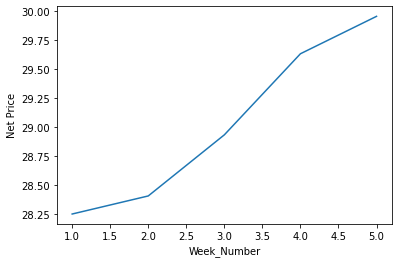

In [110]:
# plotting Weekly Average net price
s=df_jan2019[df_jan2019['Short Text'] == 'IB Ross Broiler Starter Feed'].groupby('Week_Number')['Net Price'].mean()
print(s)
plt.plot(s)
plt.xlabel("Week_Number")
plt.ylabel("Net Price")

## Soya Bean - (MP)

In [111]:
#2019 Monthly summary
dt = df_2019[df_2019['Short Text'] == 'Soya Bean - (MP)'].groupby('Order_month',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100

Soya_Bean_MP_2019_monthly_sum = dt
Soya_Bean_MP_2019_monthly_sum


,Order_month,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,1176,14766.75,533938199.66,36164.67,30500.00,39550.00,450385844.50,83552355.16,15.65
1,2,552,6938.83,267981449.86,38653.30,32592.36,39600.00,226152747.56,41828702.30,15.61
2,3,776,9900.28,374857367.49,37856.03,37300.00,39000.00,369280593.20,5576774.29,1.49


In [112]:
#Jan 2019 weekly summary
dt = jan2019[jan2019['Short Text'] == 'Soya Bean - (MP)'].groupby('Week_Number',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100

Soya_Bean_MP_Jan_2019_weekly_sum = dt
Soya_Bean_MP_Jan_2019_weekly_sum



,Week_Number,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,335,4158.65,145317641.89,34949.14,30500.00,36000.00,126838764.00,18478877.89,12.72
1,2,339,4412.58,157455526.28,35679.15,34450.00,37000.00,152013243.20,5442283.08,3.46
2,3,246,3175.89,116161159.29,36569.02,35400.00,37500.00,112426576.80,3734582.49,3.22
3,4,202,2313.38,87435437.25,37736.05,32592.36,38750.00,75398546.37,12036890.88,13.77
4,5,54,706.25,27568434.95,39033.33,38200.00,39550.00,26978826.40,589608.55,2.14


In [113]:
#Jan 2019 daily summary
dt = jan2019[jan2019['Short Text'] == 'Soya Bean - (MP)'].groupby('Order_day',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100

Soya_Bean_MP_Jan_2019_daily_sum = dt
Soya_Bean_MP_Jan_2019_daily_sum

,Order_day,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,74,954.97,33044740.90,34602.73,34500.00,35000.00,32946292.50,98448.40,0.30
1,2,39,476.65,16420088.42,34511.79,30500.00,35500.00,14537825.00,1882263.42,11.46
2,3,54,675.36,23526833.29,34835.56,34600.00,35010.00,23367559.80,159273.49,0.68
3,4,42,526.39,18456111.12,35045.71,34600.00,35750.00,18213197.80,242913.32,1.32
4,5,38,444.78,15659390.06,35168.94,34600.00,36000.00,15389284.20,270105.86,1.72
5,6,88,1080.50,38210478.10,35362.95,34600.00,36000.00,37385300.00,825178.10,2.16
6,7,85,1085.39,38481528.86,35450.94,34450.00,36000.00,37391616.60,1089912.26,2.83
7,8,64,845.83,30009417.94,35480.31,35000.00,36000.00,29604120.00,405297.94,1.35
8,9,48,652.91,23154870.88,35467.92,34450.00,36000.00,22492611.70,662259.18,2.86
9,10,38,453.34,16149115.10,35589.47,35350.00,36500.00,16025639.70,123475.40,0.76


Week_Number
1   34949.14
2   35679.15
3   36569.02
4   37736.05
5   39033.33
Name: Net Price, dtype: float64


Text(0, 0.5, 'Net Price')

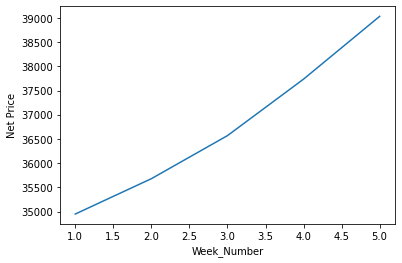

In [114]:
# plotting Weekly Average net price
s=df_jan2019[df_jan2019['Short Text'] == 'Soya Bean - (MP)'].groupby('Week_Number')['Net Price'].mean()
print(s)
plt.plot(s)
plt.xlabel("Week_Number")
plt.ylabel("Net Price")

## Maize

In [115]:
#2019 Monthly summary
dt = df_2019[df_2019['Short Text'] == 'Maize'].groupby('Order_month',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100

Maize_2019_monthly_sum = dt
Maize_2019_monthly_sum


,Order_month,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,1469,30138411.20,535099635.22,17.67,14.75,19.50,444541565.23,90558069.99,16.92
1,2,118,7051346.74,145182846.80,19.62,18.70,20.96,131860183.94,13322662.86,9.18
2,3,131,2105024.29,40788343.33,19.26,18.81,20.00,39595506.80,1192836.53,2.92


In [116]:
#Jan 2019 weekly summary
dt = jan2019[jan2019['Short Text'] == 'Maize'].groupby('Week_Number',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100

Maize_Jan_2019_weekly_sum = dt
Maize_Jan_2019_weekly_sum



,Week_Number,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,394,8259093.17,144900220.80,17.43,15.40,17.91,127190034.79,17710186.01,12.22
1,2,727,15288488.11,269588124.26,17.56,16.05,18.45,245380234.12,24207890.14,8.98
2,3,250,4784532.87,86747854.42,17.98,16.87,18.75,80715069.50,6032784.92,6.95
3,4,61,1064858.99,19831650.20,18.49,14.75,19.50,15706670.06,4124980.14,20.80
4,5,37,741438.07,14031785.54,18.84,14.75,19.25,10936211.55,3095573.99,22.06


In [117]:
#Jan 2019 daily summary
dt = jan2019[jan2019['Short Text'] == 'Maize'].groupby('Order_day',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100

Maize_Jan_2019_daily_sum = dt
Maize_Jan_2019_daily_sum

,Order_day,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,86,1780013.80,31207532.09,17.43,16.50,17.91,29370227.63,1837304.46,5.89
1,2,66,1300594.02,22701830.34,17.32,16.00,17.70,20809504.29,1892326.05,8.34
2,3,64,1182936.81,20706759.41,17.32,15.90,17.70,18808695.22,1898064.19,9.17
3,4,85,1743623.70,30638836.58,17.43,15.40,17.70,26851805.00,3787031.58,12.36
4,5,51,1194601.13,21025272.67,17.53,16.50,17.70,19710918.66,1314354.01,6.25
5,6,42,1057323.72,18619989.71,17.61,17.45,17.70,18450298.84,169690.87,0.91
6,7,154,3060135.28,53609113.71,17.44,16.50,17.70,50492232.07,3116881.64,5.81
7,8,116,2595036.51,45500777.75,17.47,16.50,17.70,42818102.45,2682675.30,5.90
8,9,100,2107436.10,36938522.12,17.48,16.05,17.65,33824349.34,3114172.78,8.43
9,10,91,2030241.82,35693199.27,17.53,17.00,18.00,34514110.96,1179088.31,3.30


Week_Number
1   17.43
2   17.56
3   17.98
4   18.49
5   18.84
Name: Net Price, dtype: float64


Text(0, 0.5, 'Net Price')

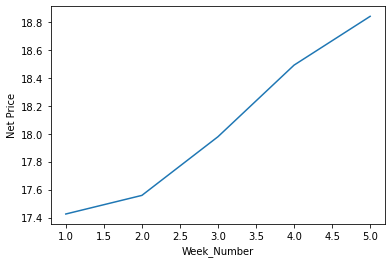

In [118]:
# plotting Weekly Average net price
s=df_jan2019[df_jan2019['Short Text'] == 'Maize'].groupby('Week_Number')['Net Price'].mean()
print(s)
plt.plot(s)
plt.xlabel("Week_Number")
plt.ylabel("Net Price")

In [119]:
"""'IB Ross Broiler Pre-Starter Feed', 'Soya Bean - (A)', 'Soya Bean',
       'Soya Bean - (MP)', 'Maize'"""

"'IB Ross Broiler Pre-Starter Feed', 'Soya Bean - (A)', 'Soya Bean',\n       'Soya Bean - (MP)', 'Maize'"

## IB Ross Broiler Pre-Starter Feed

In [120]:
#2019 Monthly summary
dt = df_2019[df_2019['Short Text'] == 'IB Ross Broiler Pre-Starter Feed'].groupby('Order_month',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100

Pre_starter_2019_monthly_sum = dt
Pre_starter_2019_monthly_sum


,Order_month,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,1921,9903450.00,302446724.50,30.53,28.45,34.30,281753152.50,20693572.00,6.84
1,2,1702,8688300.00,280386090.50,32.17,28.50,34.96,247616550.00,32769540.50,11.69
2,3,1758,9226950.00,299295922.00,32.43,30.78,34.56,284005521.00,15290401.00,5.11
3,4,3,370000.00,12265500.00,33.15,33.15,33.15,12265500.00,0.00,0.00


## 'Soya Bean - (A)'

In [121]:
#2019 Monthly summary
dt = df_2019[df_2019['Short Text'] == 'Soya Bean - (A)'].groupby('Order_month',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100

Soya_Bean_A_2019_monthly_sum = dt
Soya_Bean_A_2019_monthly_sum


,Order_month,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,794,10105.97,374112138.46,37096.86,6413.03,39750.00,64809888.79,309302249.67,82.68
1,2,768,10114.25,391099818.14,38719.44,35400.00,39750.00,358044273.00,33055545.14,8.45
2,3,384,5032.51,189500913.89,37726.34,33645.22,38310.00,169320007.04,20180906.85,10.65


## Soya Bean

In [122]:
#2019 Monthly summary
dt = df_2019[df_2019['Short Text'] == 'Soya Bean'].groupby('Order_month',as_index=False).agg(
    NumOrders=('Gross value','count'),
    PO_Quantity=('PO Quantity','sum'),
    TotalGrossValue=('Gross value','sum'),
    AvgDailyPrice=('Net Price','mean'),
    MinDailyPrice=('Net Price','min'),
    MaxDailyPrice=('Net Price','max'))
dt
dt['Estimated Value'] = (dt['MinDailyPrice']*dt['PO_Quantity'])
dt['Savings'] = (dt['TotalGrossValue']-dt['Estimated Value'])
dt['Percent Savings%'] = (dt['Savings']/dt['TotalGrossValue']) * 100
Soya_Bean_2019_monthly_sum = dt
Soya_Bean_2019_monthly_sum


,Order_month,NumOrders,PO_Quantity,TotalGrossValue,AvgDailyPrice,MinDailyPrice,MaxDailyPrice,Estimated Value,Savings,Percent Savings%
0,1,718,3762.32,135914393.26,35358.55,18437.11,39000.00,69366252.38,66548140.88,48.96
1,2,971,5179.54,196402913.16,36993.07,26917.62,39000.00,139420835.66,56982077.50,29.01
2,3,798,4803.30,177565509.03,35874.22,9780.00,37728.35,46976313.12,130589195.91,73.54


In [123]:
#to save it the csv file
# Save the preprocessed file
df.to_excel("Spend_analytics2.xlsx", index=False)
dt.to_excel("Spend_analytics1.xlsx",index=False)